In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.duplicated().sum()
# duplicated_values = data[data.duplicated()]

np.int64(240)

In [6]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

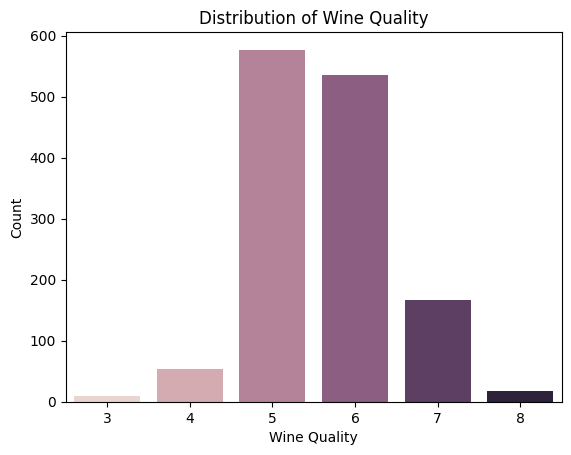

In [7]:
# Quality distribution
sns.countplot(x='quality', data=data, hue='quality',legend=False)

plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality")
plt.show()

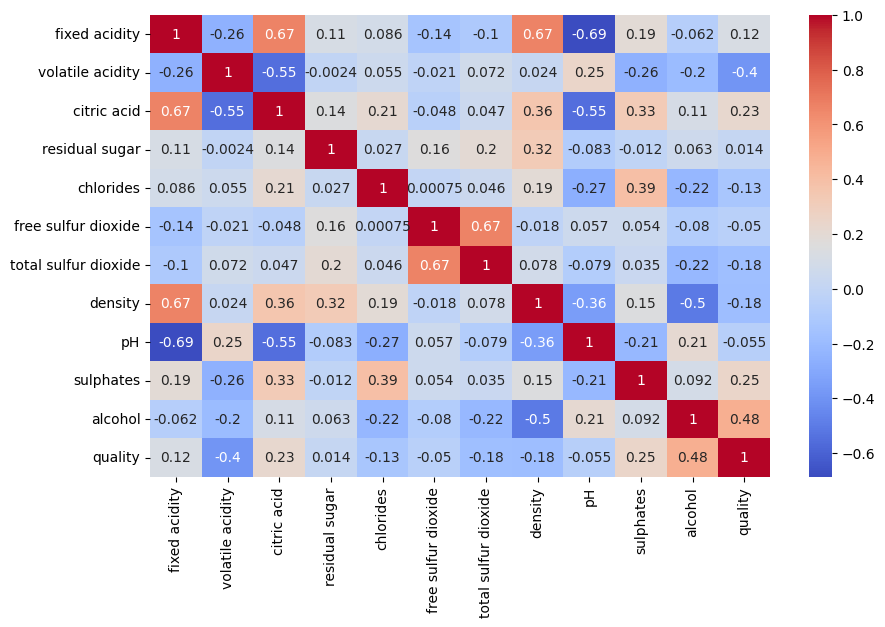

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()


<Axes: xlabel='quality', ylabel='volatile acidity'>

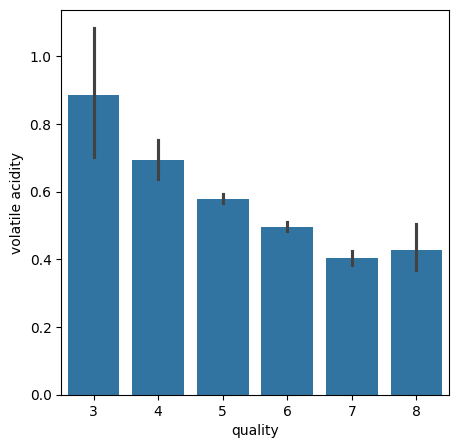

In [9]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = data)

<Axes: xlabel='quality', ylabel='citric acid'>

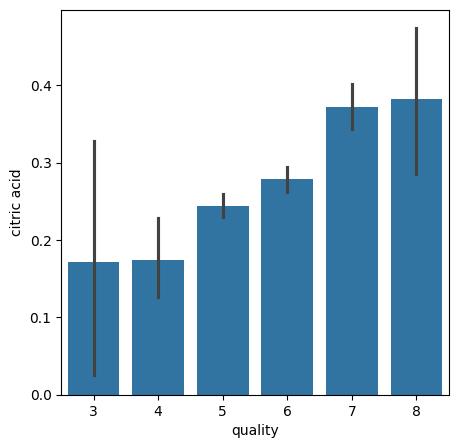

In [10]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = data)

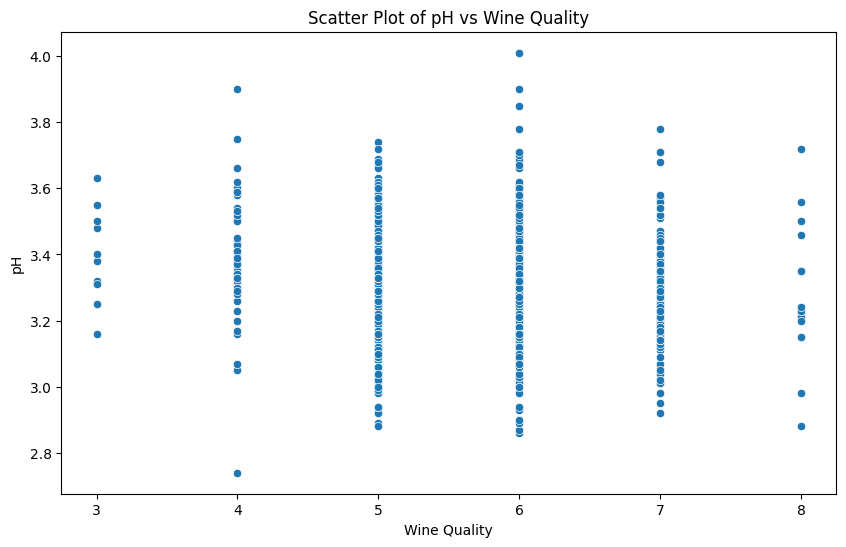

In [11]:
# Scatter plot for pH vs Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='quality', y='pH', data=data)
plt.xlabel('Wine Quality')
plt.ylabel('pH')
plt.title('Scatter Plot of pH vs Wine Quality')
plt.show()

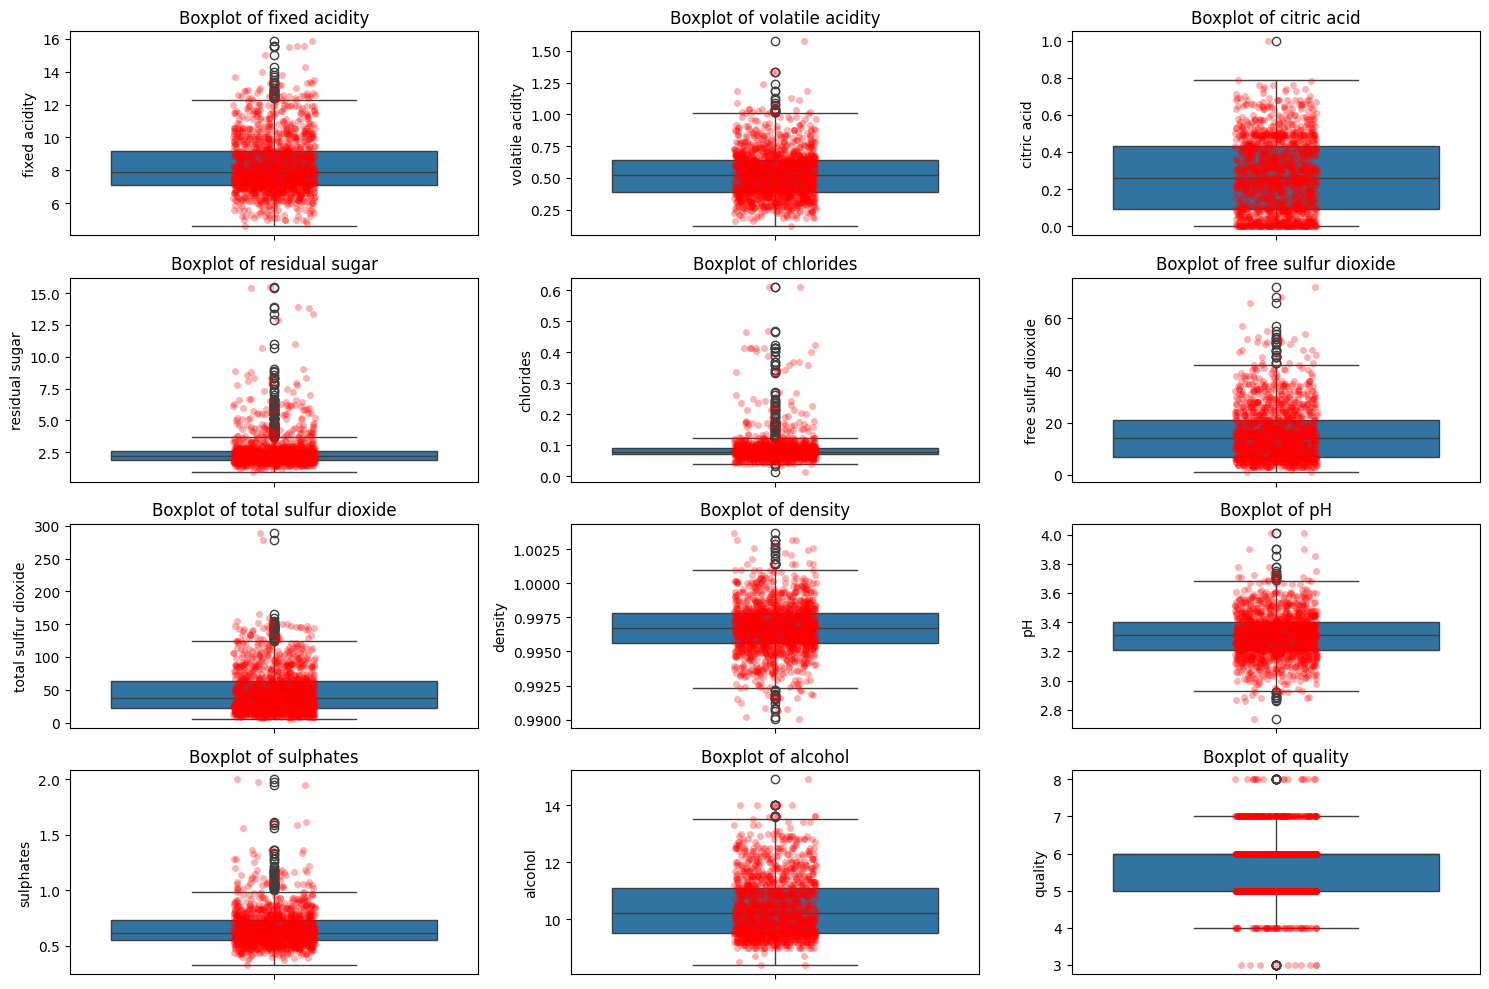

In [12]:
# Visualising outliers with boxplots and stripplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=data, y=column)
    sns.stripplot(data=data, y=column, color='red', alpha=0.3, jitter=True)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


In [13]:
# Separate the features and the target variable
y=(data['quality']>6.5).astype(int) #6.5> good (1) arulai bad(0)
X = data.drop('quality', axis=1)

In [14]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_normalized = scaler.fit_transform(X)

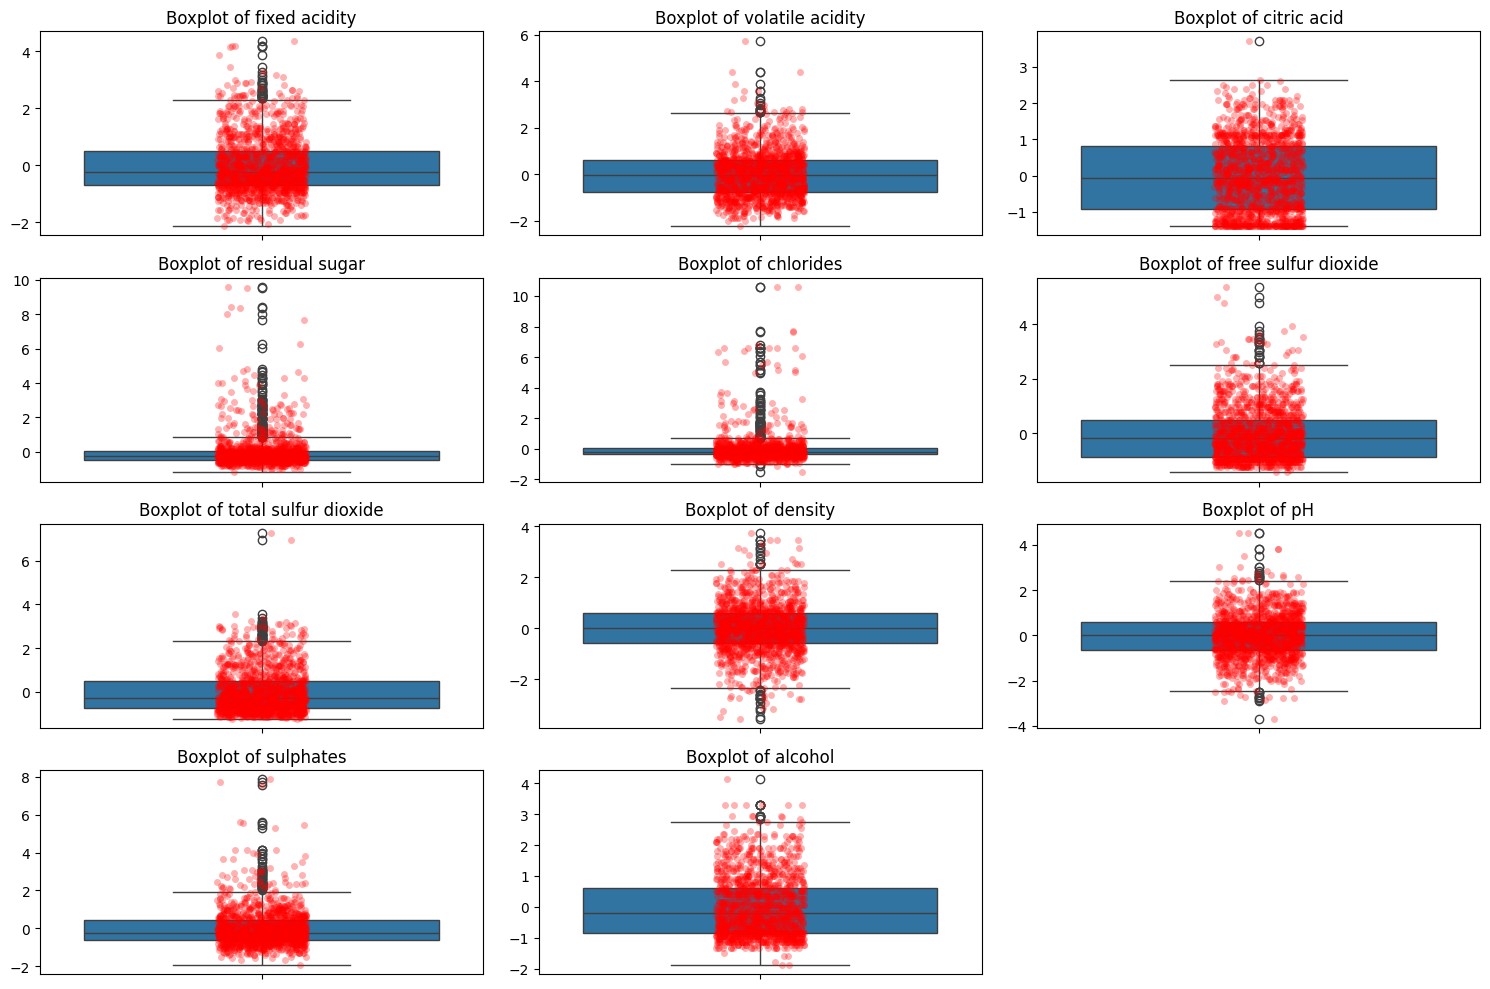

In [15]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=X_normalized[:, i-1])
    sns.stripplot(data=X_normalized[:, i-1], color='red', alpha=0.3, jitter=True)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

In [16]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the scaler on the training data and transform both training and testing data
X_train = scaler.fit_transform(X_train) # fit_transform on training data 
X_test = scaler.transform(X_test) # transform on testing data , scaling using mean and sd 

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1087, 11), (272, 11), (1087,), (272,))

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [19]:
# Evaluate the performance of the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest: {accuracy_rf}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy of Random Forest: 0.9080882352941176
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       238
           1       0.74      0.41      0.53        34

    accuracy                           0.91       272
   macro avg       0.83      0.70      0.74       272
weighted avg       0.90      0.91      0.90       272



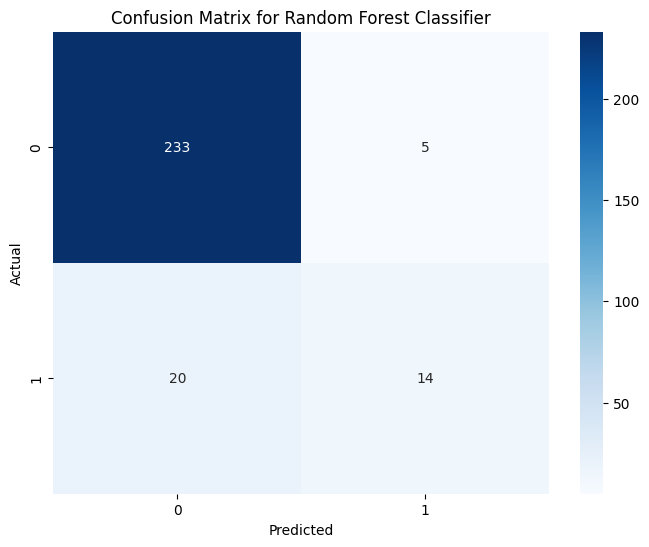

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [21]:
b=(data['quality']>6.5).astype(int) #6.5> good (1) arulai bad(0)
A = data.drop('quality', axis=1)

In [22]:
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.2, random_state=42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(A_train,b_train)
b_pred=knn.predict(A_test)


Accuracy of KNN: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.91      0.97      0.93       238
           1       0.56      0.29      0.38        34

    accuracy                           0.88       272
   macro avg       0.73      0.63      0.66       272
weighted avg       0.86      0.88      0.87       272



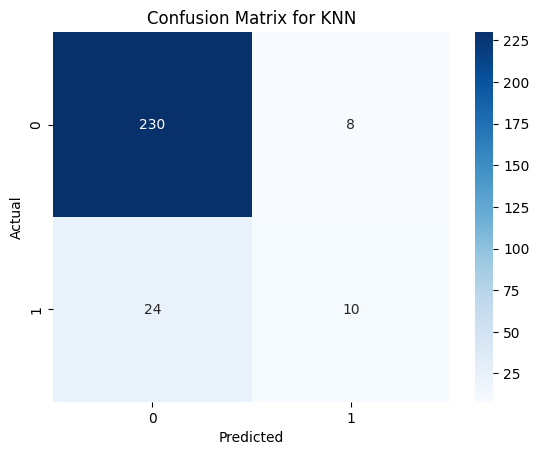

In [24]:
# Evaluate the performance
accuracy_knn = accuracy_score(b_test, b_pred)
print(f'Accuracy of KNN: {accuracy_knn}')

# Classification report
print(classification_report(b_test, b_pred, zero_division=0))

# Confusion matrix
cm_knn = confusion_matrix(b_test, b_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

In [25]:
test=[]
train=[]
for i in range(1,11):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(A_train,b_train)
  b_pred=knn.predict(A_test)
  test.append(accuracy_score(b_test,b_pred))
  b_pred=knn.predict(A_train)
  train.append(accuracy_score(b_train,b_pred))

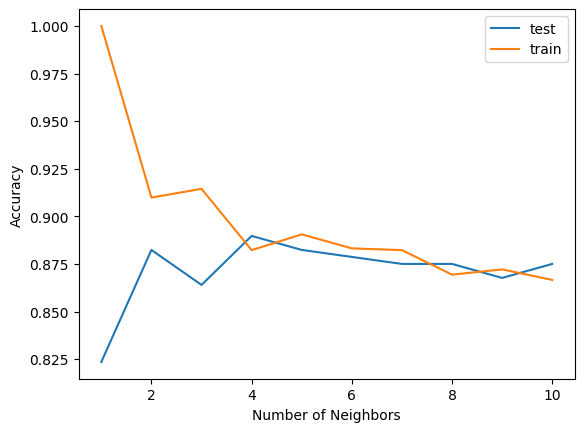

In [26]:
plt.plot(range(1,11),test,label='test')
plt.plot(range(1,11),train,label='train')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(A_train,b_train)
b_pred=knn.predict(A_test)
knn_accuracy=accuracy_score(b_test,b_pred)

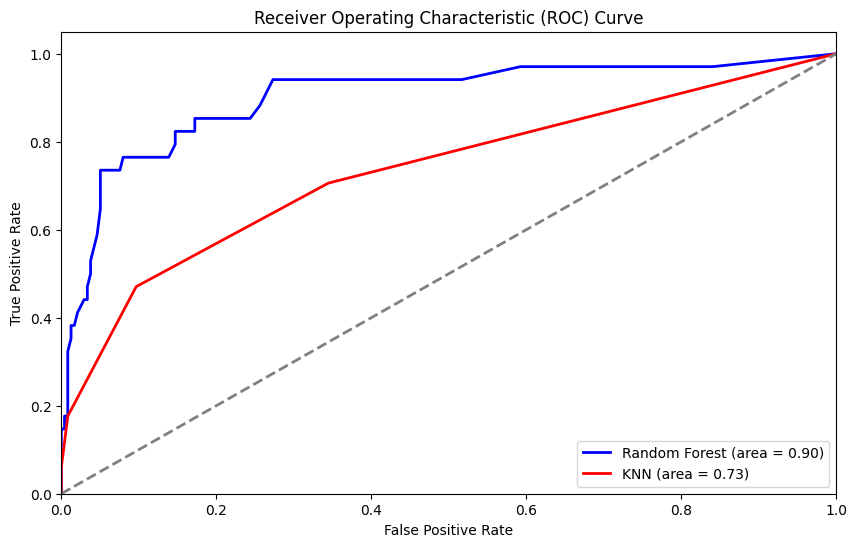

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and ROC area for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
rf_roc_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Calculate ROC curve and ROC area for KNN
knn_fpr, knn_tpr, _ = roc_curve(b_test, knn.predict_proba(A_test)[:, 1])
knn_roc_auc = roc_auc_score(b_test, knn.predict_proba(A_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(rf_fpr, rf_tpr, color='blue', lw=2, label=f'Random Forest (area = {rf_roc_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='red', lw=2, label=f'KNN (area = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [28]:
matrix = pd.DataFrame({
    'Model': ['random forest', 'KNN neighbours'],
    'Accuracy': [accuracy_rf, knn_accuracy]  # Assuming rfc, dtc, svc are pre-calculated accuracy values
})
matrix

,Model,Accuracy
0,random forest,0.908088
1,KNN neighbours,0.889706


In [29]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [30]:
# Use the RandomForestClassifier model for prediction
rf_prediction = rf.predict(input_data_reshaped)
print(rf_prediction)

if (rf_prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine


In [31]:
# Use the KNeighborsClassifier model for prediction
knn_prediction = knn.predict(input_data_reshaped)
print(knn_prediction)

if (knn_prediction[0]==1):
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

[0]
Bad Quality Wine


/Users/sarwagyaacharya/finalfds/fdsenv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
